# Imports

In [ ]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
!pip install chart_studio
import chart_studio.plotly as py
init_notebook_mode(connected=True)
from IPython.display import display
from IPython.core.display import HTML
import plotly.io as pio
pio.renderers.default = "colab"
plt.style.use('fivethirtyeight')
%matplotlib inline

     |████████████████████████████████| 64 kB 3.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=774b8ab68fc88c830dc01410dba61c773341c79ab5f24aafc54e5136f497a67a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/restaurant dataset.csv')

In [ ]:
df.head()

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine
0,19281,Plan B,No,No,Greenwich,4.2/5,1651.0,8041609100,Casual Dining,Drinks & nightlife,7.0,4.0,American
1,16095,Mom's Kitchen,No,No,East Village,NaN,0.0,"9738732072, 9742716121",Delivery,Delivery,1.0,1.0,American
2,42040,Keys Cafe - Keys Hotel,No,No,Chinatown,2.8 /5,161.0,080 39451000\n 8884038484,Casual Dining,Dine-out,7.0,3.0,Chinese
3,18753,Smally's Resto Cafe,Yes,No,Greenwich,4.0/5,401.0,"080 48149349, 9632015858",Cafe,Dine-out,7.0,5.0,Snacks
4,21065,Fabcafe,No,Yes,Chelsea,3.8 /5,11.0,8050403072,Cafe,Dine-out,1.0,2.0,Snacks



# **DEA Data Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3484 non-null   int64  
 1   name                  3484 non-null   object 
 2   table_bookings        3484 non-null   object 
 3   online_ordering       3484 non-null   object 
 4   location              3484 non-null   object 
 5   rating                2960 non-null   object 
 6   votes                 3418 non-null   float64
 7   phone                 3435 non-null   object 
 8   restaurant_type       3342 non-null   object 
 9   restaurant_operation  3456 non-null   object 
 10  popular_dishes        3312 non-null   float64
 11  cuisines_offered      3456 non-null   float64
 12  primary_cuisine       3456 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 354.0+ KB


In [ ]:
df.isnull().sum()

id                        0
name                      0
table_bookings            0
online_ordering           0
location                  0
rating                  524
votes                    66
phone                    49
restaurant_type         142
restaurant_operation     28
popular_dishes          172
cuisines_offered         28
primary_cuisine          28
dtype: int64

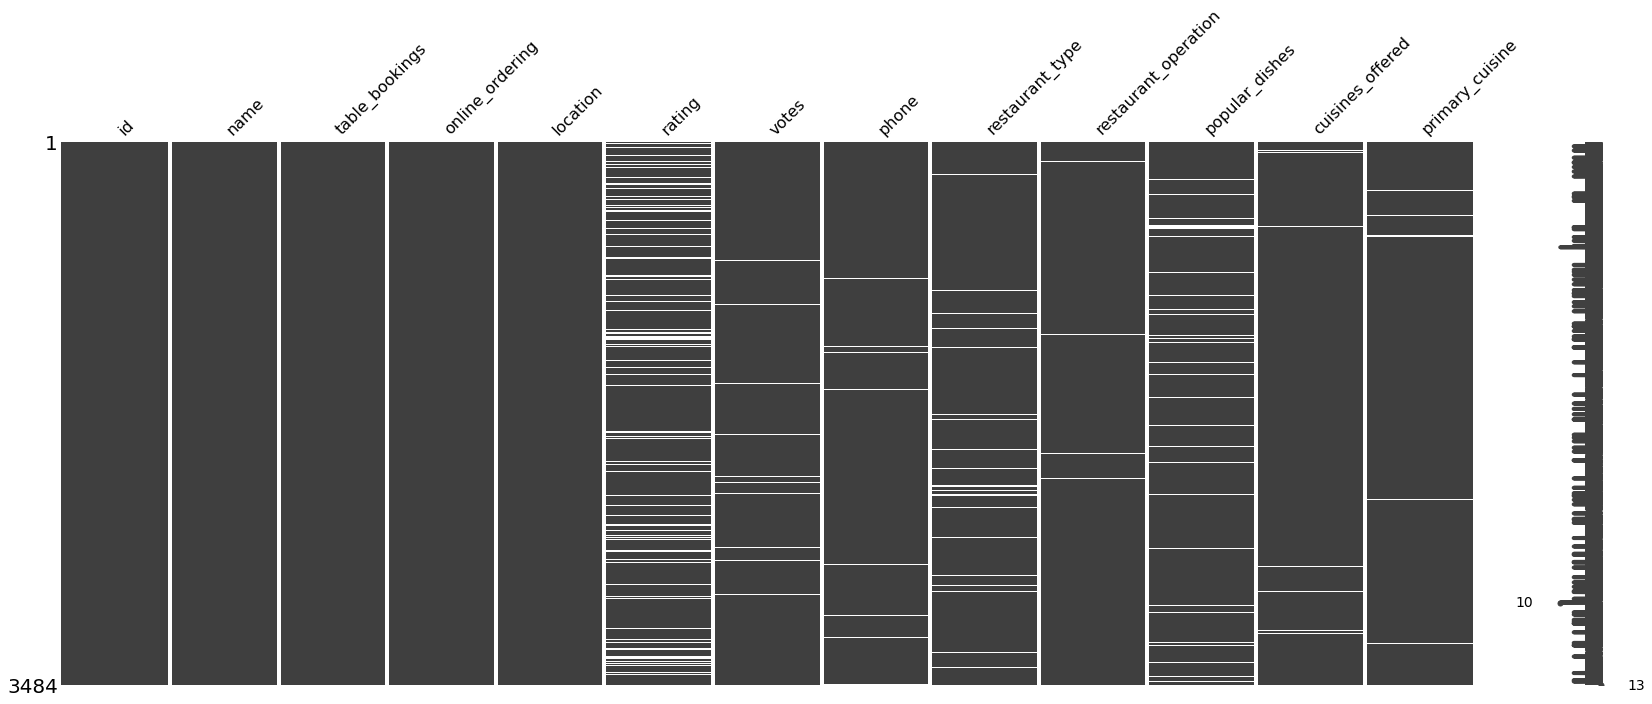

In [ ]:
import missingno as msno
msno.matrix(df)

Visualised Exploration of Locations and their %s

In [ ]:
#@title NYC Eateries % Locations
labels = list(df.location.value_counts().index)
values = list(df.location.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Locations around Manhattan <br> Where are you likely to find a place to visit",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Locations",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

In [ ]:
df.location.value_counts().index.tolist()

['Lower Manhattan',
 'Tribeca',
 'East Village',
 'Midtown',
 'Greenwich',
 'Chelsea',
 'Chinatown',
 'Staten and Ellis Islands']

In [ ]:
#@title Dashboard of Percentage of Cuisines around NYC <br> Select a location from the drop-down
locs = ['Lower Manhattan',
 'Tribeca',
 'East Village',
 'Midtown',
 'Greenwich',
 'Chelsea',
 'Chinatown',
 'Staten and Ellis Islands']

trace = [
         go.Histogram(x=df.loc[df.location.isin(['Lower Manhattan'])]['primary_cuisine'],
                 visible=True,
                opacity = 0.7,
                 name="Lower Manhattan",
                histnorm="percent",
                 hoverinfo="y",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(175, 200, 196)')
                ),

    go.Histogram(x=df.loc[df.location.isin(['Tribeca'])]['primary_cuisine'],
                          visible=False,
                          opacity = 0.7,
                          name = "Tribeca",
                          hoverinfo="y",
                          histnorm="percent",
                          #nbinsx=10,
                          marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(155, 200, 196)')
                  ),

    go.Histogram(x=df.loc[df.location.isin(['East Village'])]['primary_cuisine'],
                 visible=False,
                opacity = 0.7,
                 name = "East Village",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(155, 220, 196)')
                ),
    go.Histogram(x=df.loc[df.location.isin(['Midtown'])]['primary_cuisine'],
                 visible=False,
                opacity = 0.7,
                 name = "Midtown",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(155, 200, 216)')
                ),
    go.Histogram(x=df.loc[df.location.isin(['Greenwich'])]['primary_cuisine'],
                 visible=False,
                opacity = 0.7,
                 name = "Greenwich",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(195, 200, 196)')
                ),
    go.Histogram(x=df.loc[df.location.isin(['Chelsea'])]['primary_cuisine'],
                 visible=False,
                opacity = 0.7,
                 name = "Chelsea",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(195, 250, 196)')
                ),

      go.Histogram(x=df.loc[df.location.isin(['Chinatown'])]['primary_cuisine'],
                visible=False,
              opacity = 0.7,
                name = "Chinatown",
                hoverinfo="y",
              histnorm="percent",
              #nbinsx=10,
                marker=dict(line=dict(width=1.6,
                                    color='rgb(75, 75, 75)',),
                          color='rgb(195, 250, 196)')
              ),

      go.Histogram(x=df.loc[df.location.isin(['Staten and Ellis Islands'])]['primary_cuisine'],
            visible=False,
          opacity = 0.7,
            name = "Staten and Ellis Islands",
            hoverinfo="y",
          histnorm="percent",
          #nbinsx=10,
            marker=dict(line=dict(width=1.6,
                                color='rgb(75, 75, 75)',),
                      color='rgb(195, 250, 196)')
          ),
]

layout = go.Layout(autosize=True,
                   #height=800,
                   #width=900,
                   xaxis=dict(title="Number of Cuisines Offered",
                             titlefont=dict(size=20,),
                             tickmode="linear",),
                   yaxis=dict(title="Percentage of Cuisines <br> For each Location",
                             titlefont=dict(size=17,),),
                  )

updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False, False, False, False, False]}],
            label=locs[0],
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False, False, False, False, False]}],
            label=locs[1],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False, False, False, False, False]}],
            label=locs[2],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True, False, False, False, False]}],
            label=locs[3],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, True, False, False, False]}],
            label=locs[4],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, False, True, False, False]}],
            label=locs[5],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, False,  False, True,False]}],
            label=locs[6],
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, False, False, False, False, True]}],
            label=locs[7],
            method='update',
        ),

    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.15,
        yanchor='top',
    ),
])

layout['updatemenus'] = updatemenus

fig = dict(data=trace, layout=layout)
iplot(fig)

# Data Formatting, Cleaning and dTypes

Machine learning requires the conversion ofcategorical data into numerical to be able to be processed by the algorithms. Heere in this section we will attempt some data cleaning

In [ ]:
df['table_bookings'] = df['table_bookings'].map({'Yes':1,'No':0})

In [ ]:
df['online_ordering'] = df['online_ordering'].map({'Yes':1,'No':0})

In [ ]:
df['rating'] = df['rating'].str.rstrip("/5").str.strip()
df['rating'] = df['rating'].astype('float',errors='ignore')


# moving missing ratings to a seperate dataset to apply the ML algorithm to it later
predict = df[df['rating'].isin(['NEW','-'])].copy()

train = df[~df['rating'].isin(['NEW','-'])].copy()
train['rating'] = train['rating'].astype('float')
# train['rating'].value_counts()

In [ ]:
# setting the id column as indexes for the dataset
df.set_index('id',inplace=True)

# Geographic locations - Feature Engineering

In this section we will add some feature engineering to the dataset by adding latiude and longitude of the locations to plot on a cloropleth mapbox map

In [ ]:
df.location.value_counts().apply(pd.Series).index.tolist()

['Lower Manhattan',
 'Tribeca',
 'East Village',
 'Midtown',
 'Greenwich',
 'Chelsea',
 'Chinatown',
 'Staten and Ellis Islands']

In [ ]:
train.tail()

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine
3478,37623,Beer Adda,1,1,Tribeca,4.3,553.0,080 41106602\n 9902888658,Casual Dining,NaN,7.0,3.0,American
3479,36111,Bisimillah Biriyani's & Kebab's,0,0,Lower Manhattan,3.3,6.0,8050077699\n 9731841212,Quick Bites,Delivery,1.0,2.0,Italian
3480,11401,Jayanthi Johnson,0,0,Tribeca,3.1,21.0,NaN,Quick Bites,Dine-out,1.0,3.0,Mexican
3481,17101,Kairos,0,0,East Village,3.8,63.0,"080 40752007, 8861128718",Cafe,Dine-out,2.0,3.0,Snacks
3483,16996,Pazzo,1,0,East Village,4.3,372.0,"9500026246, 9000166663",Casual Dining,Dine-out,7.0,4.0,American


In [ ]:
lat_lon = {'Chelsea': '40.7465,-74.0014',
 'Chinatown': '40.7158,-73.9970',
 'East Village': '40.7265,-73.9815',
 'Greenwich': '40.7336,-74.0027',
 'Lower Manhattan': '40.7209,-74.0007',
 'Midtown': '40.7549,-73.9840',
 'Staten and Ellis Islands':'40.5795,-74.1502',
 'Tribeca': '40.7163,-74.0086'}

# creating columns for latitude and longitude in the dataset information from google
df['lat'] = df['location'].map(lat_lon).str.split(',').str.get(0)
df['lon'] = df['location'].map(lat_lon).str.split(',').str.get(1)

In [ ]:
# appending more data to the predict dataset after finding null values and dropping the target column
predict = predict.append(train[train['rating'].isnull()])
predict.drop(columns='rating',inplace=True)

In [ ]:
train['rating'].dropna(inplace=True)

In [ ]:
train.dropna(subset=['votes'],inplace=True)

In [ ]:
#@title Location, Location, Location
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoidGhlbm91cmVsZGluIiwiYSI6ImNsMjA1MjNhMzB0MTczY3Fvbml1ejA4cGwifQ.MXqPJzicsBJq8sU1SCKAAg")

train['lat'] = train['location'].map(lat_lon).str.split(',').str.get(0)
train['lon'] = train['location'].map(lat_lon).str.split(',').str.get(1)

train['lat'] = train['lat'].astype(float)
train['lon'] = train['lon'].astype(float)
train['rating'] = train['rating'].astype(float)
train['primary_cuisine'] = train['primary_cuisine'].astype('string')
train['votes'] = train['votes'].astype(int)

fig = px.scatter_mapbox(train, lat="lat", lon="lon",color="location",size="votes", zoom=10)
fig.show()

# Business Questions

In [ ]:
df.head()

,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,lat,lon
id,,,,,,,,,,,,,,
19281,Plan B,0,0,Greenwich,4.2,1651.0,8041609100,Casual Dining,Drinks & nightlife,7.0,4.0,American,40.7336,-74.0027
16095,Mom's Kitchen,0,0,East Village,NaN,0.0,"9738732072, 9742716121",Delivery,Delivery,1.0,1.0,American,40.7265,-73.9815
42040,Keys Cafe - Keys Hotel,0,0,Chinatown,2.8,161.0,080 39451000\n 8884038484,Casual Dining,Dine-out,7.0,3.0,Chinese,40.7158,-73.9970
18753,Smally's Resto Cafe,1,0,Greenwich,4.0,401.0,"080 48149349, 9632015858",Cafe,Dine-out,7.0,5.0,Snacks,40.7336,-74.0027
21065,Fabcafe,0,1,Chelsea,3.8,11.0,8050403072,Cafe,Dine-out,1.0,2.0,Snacks,40.7465,-74.0014


Popular votes for certain restaurant types. What seems to be popular are cafe's and casual diners, microbrewerys' etc. as the top 50 items. Thos attract voters the most to write a review.

In [ ]:
df[['restaurant_type','rating','votes']].groupby(
    ['restaurant_type','votes'])['votes'].mean(

    ).sort_values(ascending=False)[:50]

restaurant_type  votes  
Cafe             14723.0    14723.0
                 14717.0    14717.0
                 14710.0    14710.0
                 14704.0    14704.0
                 14694.0    14694.0
                 14690.0    14690.0
                 14654.0    14654.0
Casual Dining    10541.0    10541.0
                 10530.0    10530.0
                 8286.0      8286.0
                 8176.0      8176.0
                 7284.0      7284.0
                 7270.0      7270.0
                 7023.0      7023.0
Microbrewery     6998.0      6998.0
Casual Dining    6959.0      6959.0
                 6948.0      6948.0
                 6943.0      6943.0
                 6937.0      6937.0
                 6875.0      6875.0
Microbrewery     5954.0      5954.0
                 5890.0      5890.0
Casual Dining    5060.0      5060.0
                 4957.0      4957.0
                 4884.0      4884.0
                 4872.0      4872.0
                 4870.0      4870.0
   

This kind of study would suit someone looking to go into opening a business. Seeing what's popular around different regions and which operation to go for.

In [ ]:
train[['restaurant_operation','rating','location']].groupby(
    ['restaurant_operation','location'])['rating'].mean(

    ).sort_values(ascending=False)[:50]

restaurant_operation  location                
Pubs and bars         Staten and Ellis Islands    4.533333
                      Tribeca                     4.425000
Drinks & nightlife    Tribeca                     4.400000
Buffet                Lower Manhattan             4.350000
Drinks & nightlife    East Village                4.300000
Pubs and bars         Midtown                     4.200000
Cafes                 Tribeca                     4.189474
Desserts              Tribeca                     4.166667
Buffet                Staten and Ellis Islands    4.142857
Pubs and bars         Greenwich                   4.127273
Cafes                 Greenwich                   4.125000
Buffet                Greenwich                   4.119048
Dine-out              Tribeca                     4.063291
Desserts              Chinatown                   4.050000
Buffet                Chelsea                     4.042857
Cafes                 East Village                4.038462
Buffet   

In [ ]:
train[['name','rating','table_bookings','online_ordering','location']].groupby(
    ['name','location','table_bookings','online_ordering'])['rating'].mean(
    ).sort_values(ascending=False)[:10]

name                location                  table_bookings  online_ordering
Punjab Grill        Chinatown                 1               0                  4.800000
The Black Pearl     Staten and Ellis Islands  0               1                  4.800000
The Pizza Bakery    Greenwich                 1               1                  4.800000
Barbeque Nation     Midtown                   0               1                  4.716667
                    Greenwich                 0               1                  4.700000
Chianti             Tribeca                   0               1                  4.700000
Mainland China      Chinatown                 1               1                  4.700000
The Black Pearl     Tribeca                   0               1                  4.700000
Truffles            Tribeca                   0               0                  4.700000
ECHOES Koramangala  Tribeca                   0               0                  4.700000
Name: rating, dtype: f

It would seem that online ordering is the more important feature in the top 10 rated restaurants. However the number one restaurant does not yet offer an online service. This could be a good point of entry to helping the business grow and reach a larger outreach out of Chinatown and to the rest of NYC.

In [ ]:
df[['name','table_bookings','online_ordering','rating','votes']].groupby(
    ['name','table_bookings','online_ordering','rating','votes']
,as_index=False)['rating','votes'].mean().sort_values(
    by='votes',ascending=False).drop_duplicates(subset=['name'])[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,name,table_bookings,online_ordering,rating,votes
1604,Truffles,0,0,4.7,14723.0
1481,The Black Pearl,0,1,4.7,10541.0
548,Empire Restaurant,1,0,4.1,8286.0
151,Barbeque Nation,0,1,4.7,7270.0
1635,Vapour Pub & Brewery,0,1,4.2,6998.0


It would seem that the highest votes gained are from a restaurant that neither offferins online bookings or online ordering, a place that you just turn up to when you're feeling like it with multiple locations. Could be good to approach with those services to get even more business!

# Your Personal Booking Assistant - Suggest a restaurant for you in NYC

- has option to book table
- rated by at least 50 people
- rated at least 4 stars

In [ ]:
#@title Booking assistant
top_choice = train.loc[(train['table_bookings'] == 1) &
                       (train['rating'] > 4) &
                       (train['votes'] > 50)].sort_values(
                           'rating', ascending = False)
x_ax = top_choice.head(15)['name']
y_ax = top_choice.head(15)['rating']

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = top_choice.head(5)['primary_cuisine'],
          textposition='auto',
                    opacity=0.6,
          hoverinfo="text",
           hovertext=top_choice.head(15)['location']
          )
]

layout = go.Layout(title = "Hover to display the locality of the restaurant",
                  yaxis = dict(title="Recommendation Points",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Machine Learning

In [ ]:
predict.sample(10)

,id,name,table_bookings,online_ordering,location,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine
374,18970,New Ambur Hot Dum Burger,0,0,Greenwich,0.0,"9886606696, 9108783730",Quick Bites,Dine-out,1.0,1.0,Italian
2653,37502,Rayalaseema Abhiruchulu,0,0,Lower Manhattan,0.0,9742044034,Quick Bites,Dine-out,1.0,3.0,American
871,20713,Sri Venkateswara Andra Mess,0,0,Lower Manhattan,0.0,9886913332,Quick Bites,Delivery,1.0,1.0,Mexican
2062,17499,Hammered,0,0,East Village,0.0,080 45128705,Bar,Pubs and bars,7.0,4.0,American
2622,29168,Hotel Sri Kumar Bhavan,0,0,Lower Manhattan,0.0,9738001714,Quick Bites,Dine-out,1.0,1.0,Mexican
3305,16848,Hungry Monster,1,0,East Village,0.0,"6363142077, 080 43772005",Takeaway,Delivery,1.0,3.0,Italian
609,23667,Namaste,0,0,Lower Manhattan,0.0,7795680954,Quick Bites,Dine-out,1.0,1.0,Mexican
3211,11342,Food Magic,0,0,East Village,0.0,7795403785,Quick Bites,Dine-out,NaN,2.0,American
787,40901,Alankar Restaurant,0,0,Staten and Ellis Islands,0.0,9791238888,Casual Dining,Delivery,1.0,3.0,Mexican
917,50682,Red Pepper,0,0,Chinatown,0.0,8698125325,Quick Bites,Delivery,1.0,4.0,American


In [ ]:
predict.shape

(702, 12)

In [ ]:
# train.drop(columns='name',inplace=True)

In [ ]:
predict.append(train[train['rating'].isnull()])
predict.sample(15)

,id,name,table_bookings,online_ordering,location,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine
2836,9545,Namms Cafe,0,0,Lower Manhattan,0.0,8867431096,Takeaway,Delivery,1.0,2.0,American
3273,41626,Cross Roads Inn,0,0,Staten and Ellis Islands,0.0,8042087799,Casual Dining,Dine-out,1.0,3.0,American
1028,41863,S2S The Village Kitchen,0,0,Staten and Ellis Islands,0.0,8884872034\n 8008007123,Quick Bites,NaN,1.0,1.0,Mexican
2092,23384,Sri Brahmi Kuteera,0,0,Midtown,0.0,9901446277,Quick Bites,Dine-out,1.0,1.0,Mexican
3161,9820,Nuty,1,0,East Village,0.0,080 49652820,Quick Bites,Delivery,1.0,2.0,American
3020,10747,Sri Krishna Delight,1,0,Lower Manhattan,0.0,7829117777,Quick Bites,Dine-out,1.0,2.0,American
3171,45879,Cafe Braqa,1,1,Greenwich,147.0,7204874361,Cafe,Dine-out,7.0,4.0,Snacks
2189,20774,Best Burger,0,0,Midtown,0.0,8971042098,Quick Bites,Delivery,1.0,3.0,American
651,10167,Samosa Singh,1,0,East Village,0.0,080 43334333,Quick Bites,Delivery,1.0,2.0,American
2675,36099,New Shanthi Johnson,0,0,Lower Manhattan,0.0,080 43334333,Takeaway,Delivery,1.0,4.0,Mexican


In [ ]:
train.dropna(subset=['rating'],inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2726 entries, 0 to 3483
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2726 non-null   int64  
 1   name                  2726 non-null   object 
 2   table_bookings        2726 non-null   int64  
 3   online_ordering       2726 non-null   int64  
 4   location              2726 non-null   object 
 5   rating                2726 non-null   float64
 6   votes                 2726 non-null   int64  
 7   phone                 2693 non-null   object 
 8   restaurant_type       2612 non-null   object 
 9   restaurant_operation  2706 non-null   object 
 10  popular_dishes        2591 non-null   float64
 11  cuisines_offered      2707 non-null   float64
 12  primary_cuisine       2700 non-null   string 
 13  lat                   2726 non-null   float64
 14  lon                   2726 non-null   float64
dtypes: float64(5), int64(

In [ ]:
#  label encoding categorical columns for the dataset ML algorithm - this could also be done with the pipeline method
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cols = ['name','location','restaurant_type','restaurant_operation','primary_cuisine']
for i in cols:
  try:
    train[i] = label_encoder.fit_transform(train[i].astype(str))
  except:
    pass


train.head()

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,lat,lon
0,19281,569,0,0,3,4.2,1651,8041609100,2,5,7.0,4.0,1,40.7336,-74.0027
2,42040,401,0,0,1,2.8,161,080 39451000\n 8884038484,2,4,7.0,3.0,2,40.7158,-73.9970
3,18753,644,1,0,3,4.0,401,"080 48149349, 9632015858",1,4,7.0,5.0,5,40.7336,-74.0027
4,21065,266,0,1,0,3.8,11,8050403072,1,4,1.0,2.0,5,40.7465,-74.0014
5,33333,99,0,1,7,4.5,686,9902667866,2,2,7.0,4.0,2,40.7163,-74.0086


In [ ]:
"""I found the phone number column pretty useless unless
 you're going to create an automated ordering system or use it as a way to derive
   zipcodes for a more accurate map to calculate delivery times"""
train.drop(columns='phone',inplace=True)

In [ ]:
# Imputation of columns with misssing data with mean and median
missing_col = ['popular_dishes','cuisines_offered']

for i,j in enumerate(missing_col):
  if i == 0:
    train.loc[train.loc[:,j].isnull(),j]=train.loc[:,j].median()
  else:
    train.loc[train.loc[:,j].isnull(),j]=train.loc[:,j].mean()

print("count of NULL values after imputation\n")
train.isnull().sum()

count of NULL values after imputation



id                      0
name                    0
table_bookings          0
online_ordering         0
location                0
rating                  0
votes                   0
restaurant_type         0
restaurant_operation    0
popular_dishes          0
cuisines_offered        0
primary_cuisine         0
lat                     0
lon                     0
dtype: int64

In [ ]:
train.set_index('id',inplace=True)
#  Seperating training data to classical X,y
X = train.drop('rating', axis=1)
y = train['rating']

In [ ]:
y.isnull().sum()

0

### Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from warnings import filterwarnings
filterwarnings('ignore')
import re


models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    neighbors.KNeighborsRegressor(n_neighbors=5),
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

d = {}
for item in models:
    print(item)
    model = Pipeline([('scl',preprocessing.StandardScaler()), (f'{str(item)}',item)])
    model.fit(X_train, y_train)
    item = re.sub(r'[^\w]', '', str(item))
    print(f"{item} Model Score: {model.score(X_test,y_test)}")
    print(f"Mean Absolute Error:{mean_absolute_error(y_test, model.predict(X_test))}")
    print(f"Mean Squared Error:{mean_squared_error(y_test, model.predict(X_test))}")
    print(f"R2 score:{r2_score(y_test, model.predict(X_test))}",'\n')

GradientBoostingRegressor()
GradientBoostingRegressor Model Score: 0.6587509570483584
Mean Absolute Error:0.2035940693765279
Mean Squared Error:0.07751868449349524
R2 score:0.6587509570483584 

RandomForestRegressor()
RandomForestRegressor Model Score: 0.8045134012400266
Mean Absolute Error:0.13239368871252227
Mean Squared Error:0.04440705193165431
R2 score:0.8045134012400266 

KNeighborsRegressor()
KNeighborsRegressor Model Score: 0.5829674972803124
Mean Absolute Error:0.2245111111111111
Mean Squared Error:0.09473377777777776
R2 score:0.5829674972803124 

SVR()
SVR Model Score: 0.5481833557320772
Mean Absolute Error:0.2270593288454809
Mean Squared Error:0.10263539962770873
R2 score:0.5481833557320772 

SGDRegressor()
SGDRegressor Model Score: 0.4783566637530332
Mean Absolute Error:0.25973182593805244
Mean Squared Error:0.11849734390725662
R2 score:0.4783566637530332 

BayesianRidge()
BayesianRidge Model Score: 0.4789651407246588
Mean Absolute Error:0.2600127466792747
Mean Squared Erro

Most regressors will have disappointing results due to the ize and number of features of the dataset. We can run some optimisations on te best classifiers but most likely the next best approach would be to use binning and turn this into a classification probelm. Predicting number of votes made or rating ranges.

In [ ]:
from sklearn.model_selection import cross_val_score
model = make_pipeline(preprocessing.StandardScaler(),
                      GradientBoostingRegressor())

print(cross_val_score(model,X_train, y_train,cv=4))

[0.57059696 0.62610803 0.60768835 0.59697766]


In [ ]:
# takes some time to run to optimise gradientboostingregressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                }

grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(),
                        param_grid = parameters, cv = 2, n_jobs=-1)

# parameters = {'learning_rate': [0.01,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2],
#                   'n_estimators' : [100,500,1000],
#                   'max_depth'    : [4,6,8]
#                 }

# grid_GBR = RandomizedSearchCV(estimator=GradientBoostingRegressor(),
#                               param_distributions=parameters,
#                               cv=2,n_iter=10,random_state=5)




grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search" )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.7166145318253813

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}


In [ ]:
model.get_params().items()

dict_items([('memory', None), ('steps', [('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor())]), ('verbose', False), ('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor()), ('standardscaler__copy', True), ('standardscaler__with_mean', True), ('standardscaler__with_std', True), ('gradientboostingregressor__alpha', 0.9), ('gradientboostingregressor__ccp_alpha', 0.0), ('gradientboostingregressor__criterion', 'friedman_mse'), ('gradientboostingregressor__init', None), ('gradientboostingregressor__learning_rate', 0.1), ('gradientboostingregressor__loss', 'squared_error'), ('gradientboostingregressor__max_depth', 3), ('gradientboostingregressor__max_features', None), ('gradientboostingregressor__max_leaf_nodes', None), ('gradientboostingregressor__min_impurity_decrease', 0.0), ('gradientboostingregressor__min_samples_leaf', 1), ('gradientboostingregressor__min_samples_split', 2), ('gradientboostingregressor

In [ ]:
params = {"kneighborsregressor__n_neighbors":np.arange(25).tolist()}

model = make_pipeline(preprocessing.StandardScaler(),
                      neighbors.KNeighborsRegressor())

grid = GridSearchCV(estimator=model,
                    param_grid=params, cv=10)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_estimator_['kneighborsregressor'].n_neighbors)

0.49219675878457886
3


In [ ]:
params = {"kneighborsregressor__n_neighbors":range(1,26),"kneighborsregressor__weights":["uniform","distance"]}
research = RandomizedSearchCV(estimator=model, param_distributions=params,
                              cv=25,n_iter=10,random_state=5)

research.fit(X_train,y_train)
print(research.best_score_)
print(research.best_estimator_['kneighborsregressor'].n_neighbors)

0.6455257876365498
22


Adding Gadient Boosting Refgressor imrpoved results so will explore that

### Dataset with missing data - predictions

This is the dataset we left at the start full of new restaurants and missing data for our predictions - we used the best selected regression algorithm to predict ratings here

In [ ]:
try:
  predict.set_index('id',inplace=True)
  predict.drop(columns='phone',inplace=True)
except:
  pass

predict['lat'] = predict['location'].map(lat_lon).str.split(',').str.get(0)
predict['lon'] = predict['location'].map(lat_lon).str.split(',').str.get(1)

print(cols)
print(missing_col)
for i in cols:
  predict[i] = label_encoder.fit_transform(predict[i].astype(str))

for j in missing_col:
    predict.loc[predict.loc[:,j].isnull(),j]=predict.loc[:,j].median()

predict.dropna(subset=['votes'],how='any',inplace=True, axis=0)
predict.sample(5)

['name', 'location', 'restaurant_type', 'restaurant_operation', 'primary_cuisine']
['popular_dishes', 'cuisines_offered']


,name,table_bookings,online_ordering,location,votes,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,lat,lon
id,,,,,,,,,,,,
36158,24,0,0,4,0.0,10,2,1.0,3.0,3,40.7209,-74.0007
16152,264,0,0,2,0.0,10,2,1.0,2.0,0,40.7265,-73.9815
50849,212,1,0,1,0.0,10,2,1.0,1.0,2,40.7158,-73.9970
21252,31,0,0,0,0.0,10,4,1.0,2.0,0,40.7465,-74.0014
21670,163,0,0,5,0.0,10,4,1.0,3.0,0,40.7549,-73.9840


In [ ]:
predict['rating'] = grid_GBR.best_estimator_.predict(predict)

In [ ]:
top_ratings = predict.sort_values(by='rating',ascending=False)['rating']

In [ ]:
try:
  df.set_index('id',inplace=True)
except:
  pass

new_rest = pd.merge(top_ratings,df[['name',
                         'restaurant_type',
                         'restaurant_operation',
                         'votes',
                         'primary_cuisine',
                         'location']],left_index=True,right_index=True)

In [ ]:
new_rest.sort_values(by='rating',ascending=False)[:10]

,rating,name,restaurant_type,restaurant_operation,votes,primary_cuisine,location
id,,,,,,,
40505,4.578223,The Black Pearl,Casual Dining,Buffet,7284.0,American,Staten and Ellis Islands
21290,4.367757,"3B's - Buddies, Bar & Barbecues",Casual Dining,Dine-out,1168.0,American,Lower Manhattan
51065,4.270776,M Cafe - Bengaluru Marriott Hotel Whitefield,Fine Dining,Dine-out,833.0,American,Chinatown
33676,4.255340,Smally's Resto Cafe,Cafe,Desserts,1705.0,Snacks,Tribeca
29601,4.254779,Smally's Resto Cafe,Cafe,Delivery,1704.0,Snacks,Tribeca
18698,4.232042,Chinita Real Mexican Food,Casual Dining,Dine-out,2658.0,Mexican,Greenwich
26574,4.204394,Cafe Medley,Cafe,Cafes,1063.0,Snacks,Tribeca
27658,4.193982,Hunan,Casual Dining,Delivery,2246.0,Chinese,Tribeca
30082,4.185420,Cafe Medley,Cafe,Delivery,1063.0,Snacks,Tribeca


### AI restaurant selector for the foodies out there

Top 10 location predictions based on ratings on missing data using best estimator from research RandomisedGridCV.

Below tool randomises these unrated resteraunts and selects 5 for you based on them having a rating of greater than 4.0 so you can try something different each time and depending on the location of your choice.

In [ ]:
#@title Find me a new place to rate! <br> randomised every time you run the code for a new place every time
import random
top_choice = new_rest.loc[(new_rest['rating'] > 4.0)].sort_values(
                           'rating', ascending = False).sample(15)
x_ax = top_choice.head(5)['name']
y_ax = top_choice.head(5)['rating']

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = top_choice.head(5)['primary_cuisine'],
          textposition='auto',
                    opacity=0.6,
          hoverinfo="text",
           hovertext=top_choice.head(15)['location']
          )
]

layout = go.Layout(title = "Hover to display the locality of the restaurant",
                  yaxis = dict(title="Recommendation Points",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Classification

Through using binning we can turn this from a regression problem to a classification problem with the purpose of finding out which restaurants are destined to be popular!

In [ ]:
train.head()

,name,table_bookings,online_ordering,location,rating,votes,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,lat,lon
id,,,,,,,,,,,,,
19281,569,0,0,3,4.2,1651,2,5,7.0,4.0,1,40.7336,-74.0027
42040,401,0,0,1,2.8,161,2,4,7.0,3.0,2,40.7158,-73.9970
18753,644,1,0,3,4.0,401,1,4,7.0,5.0,5,40.7336,-74.0027
21065,266,0,1,0,3.8,11,1,4,1.0,2.0,5,40.7465,-74.0014
33333,99,0,1,7,4.5,686,2,2,7.0,4.0,2,40.7163,-74.0086


In [ ]:
train = train[['name',
 'table_bookings',
 'online_ordering',
 'location',
 'restaurant_type',
 'restaurant_operation',
 'popular_dishes',
 'cuisines_offered',
 'primary_cuisine',
 'lat',
 'lon',
 'votes',
 'rating',]]

In [ ]:
mask = (train["votes"] >= 1000) & (train["rating"] >= 4.0)
train.loc[mask,"bucket"] = "Top Rated"
train.loc[~mask,"bucket"] = "Work in Progress"
train["bucket"].fillna("Work in Progresss", inplace=True)
train["bucket"] = train["bucket"].map({"Top Rated":1,"Work in Progress":0})
# train.drop(columns=["id"],inplace=True)

In [ ]:
train.head()

,name,table_bookings,online_ordering,location,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,lat,lon,votes,rating,bucket
id,,,,,,,,,,,,,,
19281,569,0,0,3,2,5,7.0,4.0,1,40.7336,-74.0027,1651,4.2,1
42040,401,0,0,1,2,4,7.0,3.0,2,40.7158,-73.9970,161,2.8,0
18753,644,1,0,3,1,4,7.0,5.0,5,40.7336,-74.0027,401,4.0,0
21065,266,0,1,0,1,4,1.0,2.0,5,40.7465,-74.0014,11,3.8,0
33333,99,0,1,7,2,2,7.0,4.0,2,40.7163,-74.0086,686,4.5,0


In [ ]:
y = train["bucket"]
X = train.iloc[:,:-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=101)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(train)
data_trans

array([[6., 0., 0., ..., 1., 7., 9.],
       [4., 0., 0., ..., 0., 2., 0.],
       [7., 9., 0., ..., 0., 7., 0.],
       ...,
       [4., 0., 0., ..., 0., 3., 0.],
       [4., 0., 0., ..., 0., 6., 0.],
       [6., 9., 0., ..., 0., 8., 0.]])

In [ ]:
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold
X, y = data_trans[:, :-1], data_trans[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
model = neighbors.KNeighborsClassifier()
model.fit(X,y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.946 (0.014)


This model is able to predict to >90% accuracy whether or not a resteraunt will make it to popularity of at least 3.5 stars and 1000 votes. A great target for the digital marketing team

In [ ]:
model.predict(X).reshape(-1,1)

array([[9.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.feature_selection import VarianceThreshold
VarianceThreshold().fit(pd.DataFrame(X)).get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Things that could have also been done, clustering the dataset. Extracting feature importance from the regressor used. Reversing label encoding to see the n